# Random Forrest Model Assessment

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

## Import original train and SMOTE train data for comparision

In [2]:
X_train = pd.read_csv('../data/X_train_trans.csv')
X_smote = pd.read_csv('../data/X_train_sm.csv')

pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

pickle_in = open('../data/y_train_sm.pickle', 'rb')
y_smote = pickle.load(pickle_in)

## Confusion Matrix Function

In [3]:
#creating a confusion matrix template
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Random Forrest Classification Default Settings

In [4]:
clf_def = RandomForestClassifier(n_jobs=-1)
clf_def.fit(X_train, y_train);

In [5]:
clf_def.decision_path(X_train);

In [6]:
# print(clf.feature_importances_)

Confusion Matrix, without normalization
[[1995    0]
 [   0  338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      1.00      1.00       338

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

roc_auc_score: 1.0


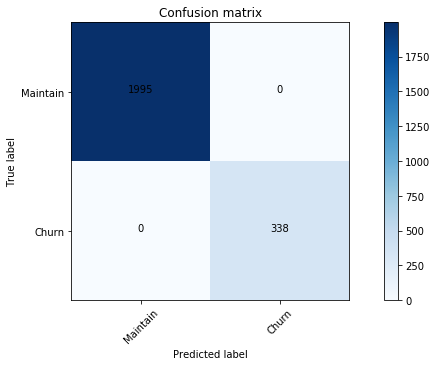

In [8]:
y_pred_def = clf_def.predict(X_train)

cm_def = confusion_matrix(y_train, y_pred_def)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm_def, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred_def))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred_def))

In [11]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_train, y_pred_def), 
                accuracy_score(y_train, y_pred_def), 
                recall_score(y_train, y_pred_def), 
                f1_score(y_train, y_pred_def)))

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1: 1.0


In [13]:
cvs_def = cross_val_score(clf_def, X_train, y_train, cv = 5, scoring = 'precision')
print('Average CV score: {}'.format(np.average(cvs_def)))

Average CV score: 0.8594339622641509


## Random Forrest Classification with max_depth=4, n_estimators=5

In [14]:
clf = RandomForestClassifier(max_depth=4, random_state=3, n_jobs=-1, n_estimators=5)
clf.fit(X_train, y_train);

In [15]:
clf.decision_path(X_train)

(<2333x129 sparse matrix of type '<class 'numpy.longlong'>'
 	with 58237 stored elements in Compressed Sparse Row format>,
 array([  0,  29,  56,  79, 106, 129]))

In [16]:
# print(clf.feature_importances_)

Confusion Matrix, without normalization
[[1995    0]
 [ 261   77]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1995
           1       1.00      0.23      0.37       338

    accuracy                           0.89      2333
   macro avg       0.94      0.61      0.65      2333
weighted avg       0.90      0.89      0.86      2333

roc_auc_score: 0.613905325443787


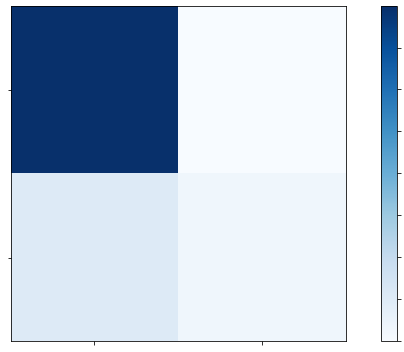

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [18]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_train, y_pred), 
                accuracy_score(y_train, y_pred), 
                recall_score(y_train, y_pred), 
                f1_score(y_train, y_pred)))

Precision: 1.0
Accuracy: 0.8881268752678955
Recall: 0.22781065088757396
F1: 0.3710843373493976


In [19]:
cvs = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'precision')
print('Average CV score: {}'.format(np.average(cvs)))

Average CV score: 0.9314285714285713


## Let's try the same with the SMOTE data

In [20]:
X_smote.shape, y_smote.shape

((3990, 168), (3990,))

In [21]:
clf2 = RandomForestClassifier(max_depth=4, random_state=3, n_jobs=-1, n_estimators=5)
clf2.fit(X_smote, y_smote);

Confusion Matrix, without normalization
[[1947   48]
 [ 241 1754]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1995
           1       0.97      0.88      0.92      1995

    accuracy                           0.93      3990
   macro avg       0.93      0.93      0.93      3990
weighted avg       0.93      0.93      0.93      3990

roc_auc_score: 0.9275689223057644


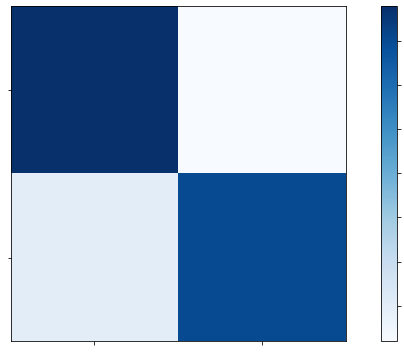

In [22]:
from sklearn.metrics import confusion_matrix
y_pred2 = clf2.predict(X_smote)

cm2 = confusion_matrix(y_smote, y_pred2)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm2, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_smote, y_pred2))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_smote, y_pred2))

In [23]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_smote, y_pred2), 
                accuracy_score(y_smote, y_pred2), 
                recall_score(y_smote, y_pred2), 
                f1_score(y_smote, y_pred2)))

Precision: 0.9733629300776915
Accuracy: 0.9275689223057644
Recall: 0.8791979949874686
F1: 0.9238872794311299


In [24]:
cvs2 = cross_val_score(clf2, X_smote, y_smote, cv = 5, scoring = 'precision')
print('Average CV score: {}'.format(np.average(cvs2)))

Average CV score: 0.8705038004197616
